# Redes Neurais

Redes Neurais é um dos algoritmos mais antigos de Machine Learning. Sua interpretação foi baseada em um neurônio biológico e suas abstrações para o mundo digital. Possui um poder de mapeamento universal (Teorema de Aproximação Universal: Uma rede neural com 1 camada intermediária é capaz de aproximar qualquer mapeamento, dada algumas limitações). 

Desta forma, são um dos algoritmos mais poderosos no arsenal de um Cientista de Dados que trabalha com dados complexos. Semelhante ao Random Forest, o algoritmo deve ajustar uma quantidade gigantesca de parâmetros, o que pode ser considerado uma faca de dois gumes, pois se feito de forma errada, é bem provável que entre em regime de overfitting.

Neste notebook vamos estudar Redes Neurais Artificiais e Redes Neurais Convolucionais, onde vamos entender suas principais diferenças, e entender porquê existe essa hype tão grande em cima das Redes Neurais Profundas (Deep Learning).

In [1]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando o dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
X = pd.get_dummies(X)

In [6]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [7]:
X.drop(['Geography_France', 'Gender_Male'], axis=1, inplace=True) # Evitando Dummy Variable Trap

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,1


In [9]:
# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,-0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,-0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,1.091687


## Criando a Rede Neural

In [12]:
# Importando as bibliotecas e classes
import keras
from keras.models import Sequential
from keras.layers import Dense

# Inicializando a rede
classifier = Sequential()

# Adicionando a primeira camada escondida
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11)) # 6 neurônios, é a segunda camada escondida

# Adicionando a segunda camada escondida
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu')) # não é necessário informar a camada de saída

# Adicionando a camada de saída
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')) # Uma saída, utilizando ativação sigmoid para probabilidades

# Compilando a rede
# adam = Um tipo de descida de gradiente estocástico
# metrics = accuracy
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


Neste caso, nossa rede neural tem 3 camadas, com 11 neurônios na primeira camada, 6 neurônios na segunda camada, e 1 neurônio na cama de saída.

Nas camadas de Entrada e Escondida foram utilizadas funções de ativação ReLu, e na camada de saída foi utilizada a função de ativação Sigmoid (problema de classificação binária).

O algoritmo de otimização utilizado foi ADAM (um algoritmo tipo Descida de Gradiente Estocástico), e a métrica utilizada foi acurácia.

In [13]:
# Treinando a rede
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
8000/8000 [==============================] - 0s - loss: 0.4893 - acc: 0.7955     
Epoch 2/100
8000/8000 [==============================] - 0s - loss: 0.4307 - acc: 0.7960     
Epoch 3/100
8000/8000 [==============================] - 0s - loss: 0.4279 - acc: 0.7960     
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 0.4250 - acc: 0.7960     
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 0.4213 - acc: 0.8146     
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 0.4187 - acc: 0.8251     
Epoch 7/100
8000/8000 [==============================] - 0s - loss: 0.4162 - acc: 0.8270     
Epoch 8/100
8000/8000 [==============================] - 0s - loss: 0.4148 - acc: 0.8282     
Epoch 9/100
8000/8000 [==============================] - 0s - loss: 0.4133 - acc: 0.8290     
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 0.4119 - acc: 0.8319     
Epoch 11/100
8000/8000 [==============================] - 0

8000/8000 [==============================] - 1s - loss: 0.3997 - acc: 0.8347     
Epoch 88/100
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8340     
Epoch 89/100
8000/8000 [==============================] - 1s - loss: 0.4002 - acc: 0.8352     
Epoch 90/100
8000/8000 [==============================] - 1s - loss: 0.3999 - acc: 0.8349     
Epoch 91/100
8000/8000 [==============================] - 1s - loss: 0.3998 - acc: 0.8340     
Epoch 92/100
8000/8000 [==============================] - 0s - loss: 0.3999 - acc: 0.8356     
Epoch 93/100
8000/8000 [==============================] - 1s - loss: 0.3999 - acc: 0.8341     
Epoch 94/100
8000/8000 [==============================] - 1s - loss: 0.4000 - acc: 0.8369     
Epoch 95/100
8000/8000 [==============================] - 0s - loss: 0.3999 - acc: 0.8351     
Epoch 96/100
8000/8000 [==============================] - 0s - loss: 0.4000 - acc: 0.8357     
Epoch 97/100
8000/8000 [==============================] - 1s - 

In [14]:
# Prevendo os resultados
y_pred = classifier.predict(X_test) # Retorna probabilidades
y_pred = (y_pred > 0.5) # Retorna 1 para maior que 0,5 e 0 caso contrário
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

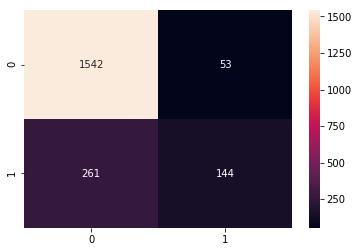

Acurácia: 0.843


In [15]:
# Criando a matriz de confusão e acurácia
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()
print('Acurácia: {}'.format(acc))

# Redes Neurais Convolucionais

Redes Neurais Convolucionais são amplamente utilizadas em reconhecimento de imagens, reconhecimento de voz, geração artificial de imagens e voz, no campo médico, entre outras aplicações. Seu poder está na imensa quantidade de pesos ajustados e em sua capacidade de extração automática de features, não sendo necessário nenhum preparo prévio de estudo de relevância de features (a rede aprende o que é importante e o que não é).

Consequentemente, dada a imensa quantidade de pesos à serem ajustados, o custo computacional de treino de uma rede neural convolucional é alto. Para estes casos, utiliza-se GPUs, ou Unidades Gráficas de Processamento, que aceleram o processamento desse tipo de Rede.

Para nosso curso, usaremos um conjunto de dados pequeno para que não seja necessário extrapolar as capacidades dos notebooks.

In [16]:
# Importando as bibliotecas e Classes
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
# Inicializando a Rede
classifier = Sequential()

# 32, 3, 3 - Número de filtros, Dimensão dos filtros (3x3)
# input shape = 3 camadas (RGB), 64x64 pixels em cada
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# 2x2 - Tamanho da forma de pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

# Adicionando uma segunda camada de convolução e maxpooling
classifier.add(Convolution2D(32, 3, 3, activation = 'relu')) # não é necessário informar input_shape
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full Connection
# Output_dim = Número de neurônios na camada escondida = 128
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid')) # output layer, sigmoid function, binary outcome

# Compilando a CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Image augmentation - Usado para evitar overfitting
# Image augmentation cria um novo batch de imagens com pequenas mudanças, 
# de forma a aumentar virtualmente o número de imagens
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, # Cria imagens com tamanhos diferentes
                                   shear_range=0.2, # Transformações geométricas
                                   zoom_range=0.2, # Zoom randômico 
                                   horizontal_flip=True) # Flipping

test_datagen = ImageDataGenerator(rescale=1./255) # É apenas necessário fazer rescale

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size=(64, 64), # Dimensão esperada pela CNN
                                                 batch_size=32, # Número de imagens simultâneas na CNN
                                                 class_mode='binary') # 2 classes

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                             target_size=(64, 64),
                                             batch_size=32,
                                             class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
# Treinando a rede
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/32, # samples_per_epoch/batch_size
                         epochs = 10,
                         verbose = 1,
                         validation_data = test_set,
                         validation_steps = 2000/32)

Epoch 1/10
250/250 [==============================] - 61s - loss: 0.6885 - acc: 0.5370 - val_loss: 0.6654 - val_acc: 0.6430
Epoch 2/10
250/250 [==============================] - 57s - loss: 0.6284 - acc: 0.6400 - val_loss: 0.6091 - val_acc: 0.6655
Epoch 3/10
250/250 [==============================] - 58s - loss: 0.5818 - acc: 0.6836 - val_loss: 0.5707 - val_acc: 0.7300
Epoch 4/10
250/250 [==============================] - 62s - loss: 0.5533 - acc: 0.7196 - val_loss: 0.5350 - val_acc: 0.7395
Epoch 5/10
250/250 [==============================] - 62s - loss: 0.5344 - acc: 0.7276 - val_loss: 0.5090 - val_acc: 0.7555
Epoch 6/10
250/250 [==============================] - 65s - loss: 0.5118 - acc: 0.7423 - val_loss: 0.5029 - val_acc: 0.7530
Epoch 7/10
250/250 [==============================] - 58s - loss: 0.5039 - acc: 0.7549 - val_loss: 0.4818 - val_acc: 0.7800
Epoch 8/10
250/250 [==============================] - 61s - loss: 0.4917 - acc: 0.7555 - val_loss: 0.4854 - val_acc: 0.7665
Epoch 9/